In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.linear_model

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 13.0) # set default size of plots

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Display numbers more compactly
np.set_printoptions(precision=3)
pd.set_option("display.precision", 3)
# When to wrap numpy output
np.set_printoptions(linewidth=200)

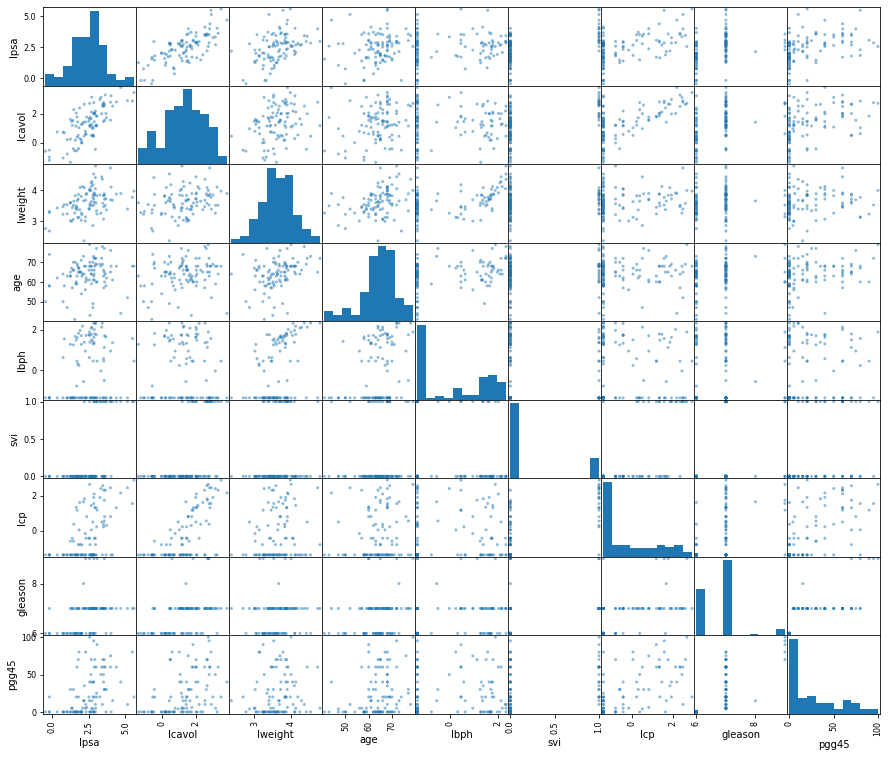

In [14]:
# See https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.info.txt
prostate_raw = pd.read_csv("prostate-cancer.tsv", sep='\t')

training_split = prostate_raw[["train"]].to_numpy().flatten()  # make 1d array to use for boolean indexing later
prostate_response = prostate_raw[["lpsa"]]
prostate_predictors = prostate_raw[["lcavol", "lweight", "age", "lbph", "svi", "lcp", "gleason", "pgg45"]]

scatter_matrix_plot = pd.plotting.scatter_matrix(
    pd.concat([prostate_response, prostate_predictors], axis=1)
)

In [22]:
# Scale *predictors only* based on *both* training and test sets
scaler = sklearn.preprocessing.StandardScaler()
Xall = scaler.fit_transform(prostate_predictors)  # computes variance dividing by n, not n - 1
yall = prostate_response.to_numpy()

Xtr = Xall[training_split == "T",:]
Xte = Xall[training_split == "F",:]
ytr = yall[training_split == "T",:]
yte = yall[training_split == "F",:]

In [23]:
# Print table 3.1 from the book
np.corrcoef(Xtr.T)

array([[ 1.   ,  0.3  ,  0.286,  0.063,  0.593,  0.692,  0.426,  0.483],
       [ 0.3  ,  1.   ,  0.317,  0.437,  0.181,  0.157,  0.024,  0.074],
       [ 0.286,  0.317,  1.   ,  0.287,  0.129,  0.173,  0.366,  0.276],
       [ 0.063,  0.437,  0.287,  1.   , -0.139, -0.089,  0.033, -0.03 ],
       [ 0.593,  0.181,  0.129, -0.139,  1.   ,  0.671,  0.307,  0.481],
       [ 0.692,  0.157,  0.173, -0.089,  0.671,  1.   ,  0.476,  0.663],
       [ 0.426,  0.024,  0.366,  0.033,  0.307,  0.476,  1.   ,  0.757],
       [ 0.483,  0.074,  0.276, -0.03 ,  0.481,  0.663,  0.757,  1.   ]])

In [24]:
# add intercept term (bias)
Xtr = np.insert(Xtr, 0, 1, axis=1)  
Xte = np.insert(Xte, 0, 1, axis=1)  

XTXinv = np.linalg.inv(Xtr.T.dot(Xtr))
B = XTXinv.dot(Xtr.T.dot(ytr))
B

array([[ 2.465],
       [ 0.676],
       [ 0.262],
       [-0.141],
       [ 0.209],
       [ 0.304],
       [-0.287],
       [-0.021],
       [ 0.266]])

In [25]:
#sklearn.linear_model.LinearRegression().fit(Xtr, ytr).coef_

array([[ 0.   ,  0.676,  0.262, -0.141,  0.209,  0.304, -0.287, -0.021,  0.266]])